In [1]:
# Bitcoin price prediction using Recurrent Neural Network And Time Series Analysis

In [2]:
# Imports

# Numpy
import numpy as np

# Pandas
import pandas as pd

# For Square Root
from math import sqrt

# Python's Statistical Data Visualization Library
import seaborn as sns

# For calculating cartesian product
from itertools import product

# For LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense

# For ARIMA Model 
from statsmodels.tsa.arima_model import ARIMA

# For Adfuller test 
from statsmodels.tsa.stattools import adfuller

# Transform features by scaling each feature to a given range
from sklearn.preprocessing import MinMaxScaler

# Mean squared error regression loss
from sklearn.metrics import mean_squared_error

# For splitting data into testing and training data
from sklearn.model_selection import train_test_split

# For Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# For RMSE
from sklearn import metrics

# Decompose time series data into seasonal components
from statsmodels.tsa.seasonal import seasonal_decompose

# For Plotting.
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
# Data Loading and Processing.
# Data taken from Yahoo Finance it contains Date, Open Price, Closing Price, High, Low, And Adjusted Closing Price
# We are considoring Adjusted Closing Price for price prediction. 
# Adjusted closing price amends a stock's closing price to accurately reflect that stock's value

df = pd.read_csv("BTC-USD.csv", header=0)
df["Date"] = pd.to_datetime(df["Date"])
df.index = df["Date"]

In [4]:
#Data Visualization

In [5]:
print("\nInfo")
print(df.info())

print("\nDescribe")
print(df.describe())

print("\nIs NULL value avialable")
print(df.isnull().any())


print("\nTop 10 Values")
print(df.head(10))


Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1933 entries, 2014-09-17 to 2020-01-01
Data columns (total 7 columns):
Date         1933 non-null datetime64[ns]
Open         1933 non-null float64
High         1933 non-null float64
Low          1933 non-null float64
Close        1933 non-null float64
Adj Close    1933 non-null float64
Volume       1933 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 120.8 KB
None

Describe
               Open          High           Low         Close     Adj Close  \
count   1933.000000   1933.000000   1933.000000   1933.000000   1933.000000   
mean    3762.059565   3864.293850   3651.297436   3765.453507   3765.453507   
std     3958.178919   4088.557531   3803.901181   3958.220765   3958.220765   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      414.441010    418.375000    406.783997    414.321014    414.321014   
50%     1723.890015   1788.439941   1661.910034   1734.44995

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


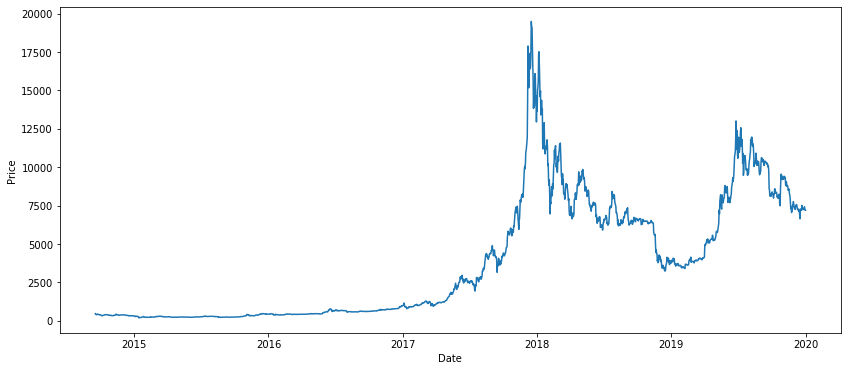

In [6]:
# Plotting of Ajusted Closing price with time.
prices = df["Adj Close"]
plt.figure(figsize = (14,6))
fig = sns.lineplot(x = df.index, y = prices)
fig.set(xlabel='Date', ylabel='Price')
plt.show()

In [7]:
corr = df.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998800,0.998083,0.997521,0.997521,0.766479
High,0.998800,1.000000,0.997682,0.999008,0.999008,0.767540
Low,0.998083,0.997682,1.000000,0.998651,0.998651,0.767112
Close,0.997521,0.999008,0.998651,1.000000,1.000000,0.767211
Adj Close,0.997521,0.999008,0.998651,1.000000,1.000000,0.767211
Volume,0.766479,0.767540,0.767112,0.767211,0.767211,1.000000


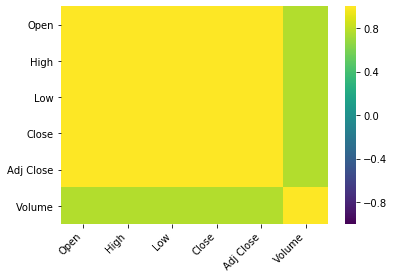

In [8]:
#Generating heatmap to visualize correlation between features.
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='viridis',
    square=False, 
    annot=False, 
    fmt="g"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
#Model Training and Testing

In [10]:
#Bitcoin Price Prediction Using Linear Regression

In [11]:
d = df.drop(['Volume', 'Date'], 1)
trainX, testX, trainY, testY = train_test_split(d.drop(['Adj Close'], 1), d['Adj Close'], test_size=0.3, random_state=None, shuffle=False)
print(len(trainX), len(testX), len(trainY), len(testY))
testDate = testY.index

1353 580 1353 580


In [12]:
linerRegression = LinearRegression()
linerRegression.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
predictions = linerRegression.predict(testX)

In [14]:
print('\nCoefficients: ', linerRegression.coef_)
print('\nIntercept: ', linerRegression.intercept_)

# Evaluation Metrics
print("\nMAE: ", metrics.mean_absolute_error(testY, predictions))
print("\nMSE: ", metrics.mean_squared_error(testY, predictions))
print('\nRMSE: ', np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('\nR-Square: ', metrics.r2_score(testY, predictions))


Coefficients:  [-5.50625914e-16 -4.44089210e-16  5.55111512e-17  1.00000000e+00]

Intercept:  0.0

MAE:  4.320099833421409e-13

MSE:  5.701128446001255e-25

RMSE:  7.550581729907475e-13

R-Square:  1.0


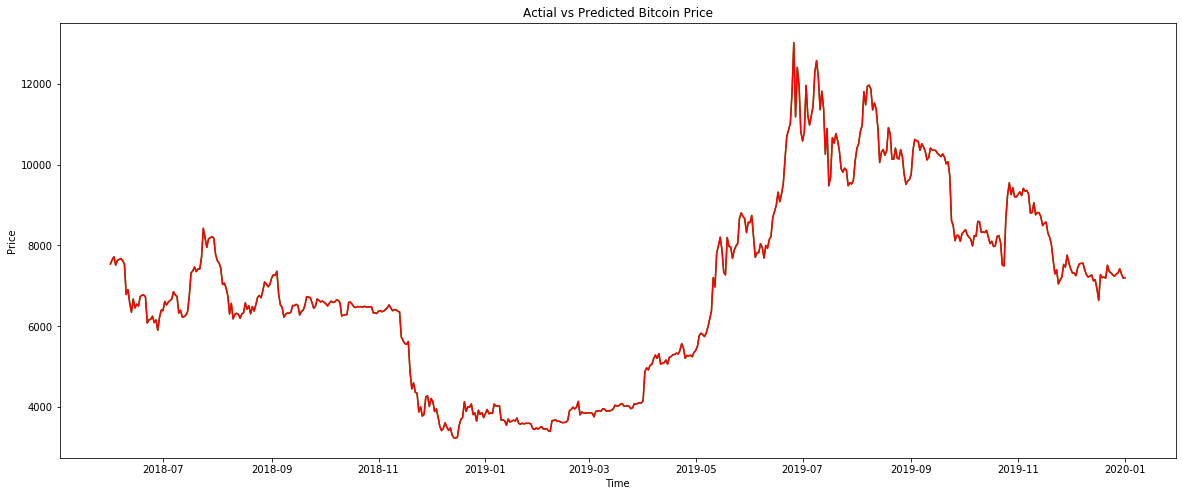

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(testDate, testY.to_numpy(), color = 'green', label='Actual Price of Bitcoin')
plt.plot(testDate, predictions, color = 'red', label='Predicted Price of Bitcoin')
plt.title('Actial vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [16]:
#Bitcoin Price Prediction Using Lasso Regularization

In [17]:
lasso = Lasso()
lasso.fit(trainX, trainY)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
predictions = lasso.predict(testX)

In [19]:
print('\nCoefficients: ', linerRegression.coef_)
print('\nIntercept: ', linerRegression.intercept_)

# Evaluation Metrics
print("\nMAE: ", metrics.mean_absolute_error(testY, predictions))
print("\nMSE: ", metrics.mean_squared_error(testY, predictions))
print('\nRMSE: ', np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('\nR-Square: ', metrics.r2_score(testY, predictions))


Coefficients:  [-5.50625914e-16 -4.44089210e-16  5.55111512e-17  1.00000000e+00]

Intercept:  0.0

MAE:  36.7607025564876

MSE:  2782.113187926469

RMSE:  52.74574094584764

R-Square:  0.9994767199840741


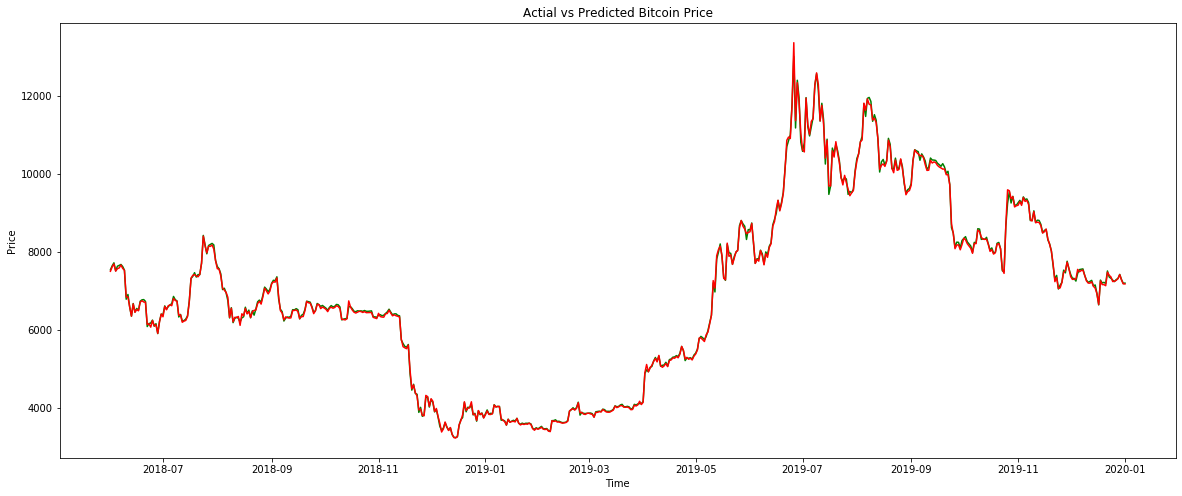

In [20]:
plt.figure(figsize=(20, 8))
plt.plot(testDate, testY.to_numpy(), color = 'green', label='Actual Price of Bitcoin')
plt.plot(testDate, predictions, color = 'red', label='Predicted Price of Bitcoin')
plt.title('Actial vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [21]:
#Bitcoin Price Prediction Using Ridge Regularization

In [22]:
ridge = Ridge()
ridge.fit(trainX, trainY)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
predictions = lasso.predict(testX)

In [24]:
print('\nCoefficients: ', linerRegression.coef_)
print('\nIntercept: ', linerRegression.intercept_)

# Evaluation Metrics
print("\nMAE: ", metrics.mean_absolute_error(testY, predictions))
print("\nMSE: ", metrics.mean_squared_error(testY, predictions))
print('\nRMSE: ', np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('\nR-Square: ', metrics.r2_score(testY, predictions))


Coefficients:  [-5.50625914e-16 -4.44089210e-16  5.55111512e-17  1.00000000e+00]

Intercept:  0.0

MAE:  36.7607025564876

MSE:  2782.113187926469

RMSE:  52.74574094584764

R-Square:  0.9994767199840741


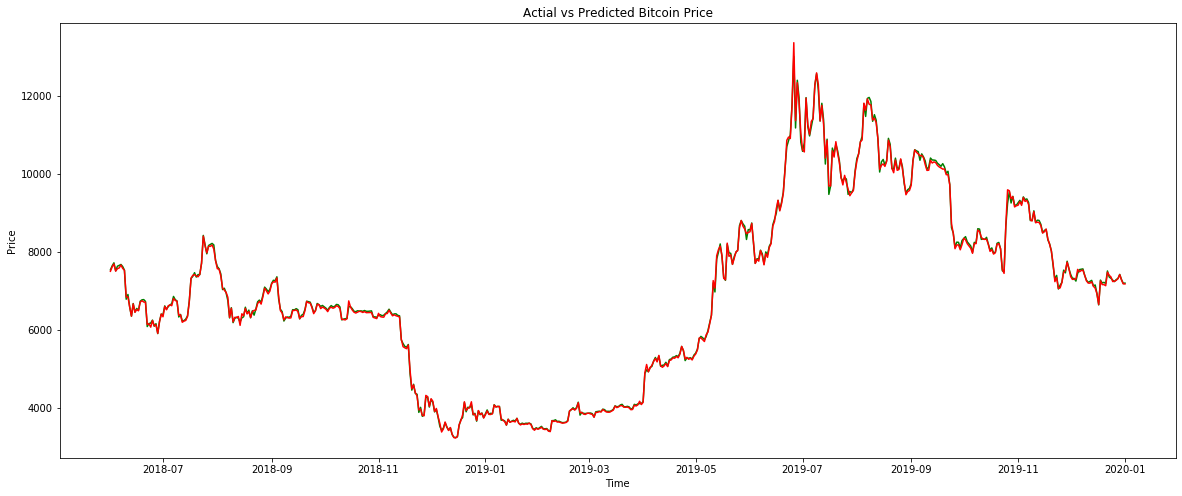

In [25]:
plt.figure(figsize=(20, 8))
plt.plot(testDate, testY.to_numpy(), color = 'green', label='Actual Price of Bitcoin')
plt.plot(testDate, predictions, color = 'red', label='Predicted Price of Bitcoin')
plt.title('Actial vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [28]:
#Doing changes in dataset to make the open, closing, high, low prices of previous day as the input 
#for predicting the adj_close of next day. Also we will test our data with unseen data of January And Feburary

trainY = d['Adj Close'][1:]
trainX = d.drop(['Adj Close'], 1)[:-1]

In [36]:
#importing new dataset for testing purpose
df_new = pd.read_csv("BTC-USD-NEW.csv", header=0)
df_new["Date"] = pd.to_datetime(df_new["Date"])
df_new.index = df_new["Date"]

d_new = df_new.drop(['Volume', 'Date'], 1)
testY = d_new['Adj Close'][1:]
testX = d_new.drop(['Adj Close'], 1)[:-1]

print(len(trainX), len(testX), len(trainY), len(testY))
testDate = testY.index

1932 57 1932 57


In [37]:
# Applying Linear Regression on new Dataset
linerRegression = LinearRegression()
linerRegression.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
predictions = linerRegression.predict(testX)

In [39]:
print('\nCoefficients: ', linerRegression.coef_)
print('\nIntercept: ', linerRegression.intercept_)

# Evaluation Metrics
print("\nMAE: ", metrics.mean_absolute_error(testY, predictions))
print("\nMSE: ", metrics.mean_squared_error(testY, predictions))
print('\nRMSE: ', np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('\nR-Square: ', metrics.r2_score(testY, predictions))


Coefficients:  [ 0.01912502 -0.06672302 -0.07633558  1.12056837]

Intercept:  14.09933828490739

MAE:  193.03716227583269

MSE:  62033.63401953322

RMSE:  249.0655215390786

R-Square:  0.9095996761992562


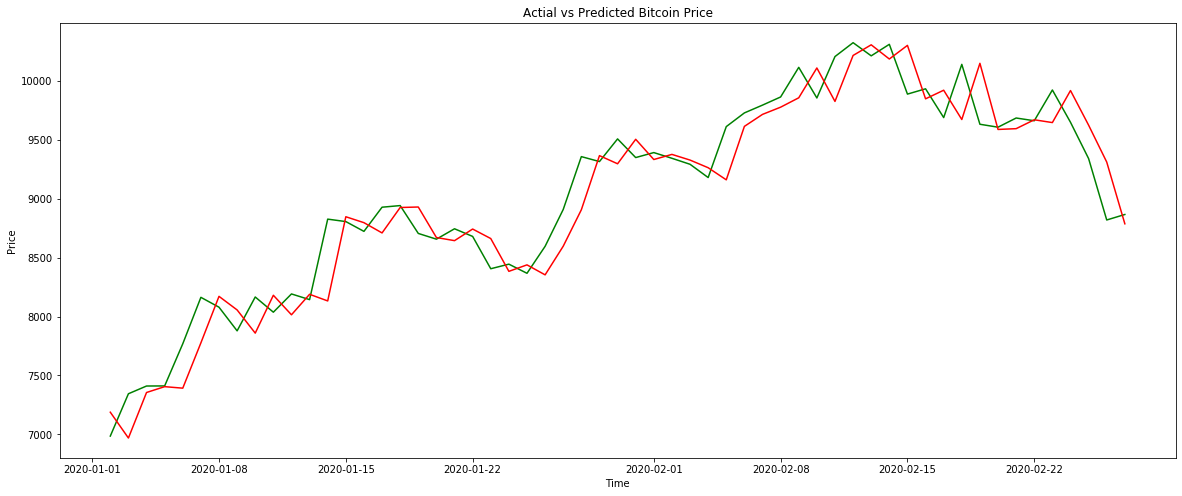

In [40]:
plt.figure(figsize=(20, 8))
plt.plot(testDate, testY.to_numpy(), color = 'green', label='Actual Price of Bitcoin')
plt.plot(testDate, predictions, color = 'red', label='Predicted Price of Bitcoin')
plt.title('Actial vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [89]:
#Applying Lasso Regularization on new Dataset

In [41]:
lasso = Lasso()
lasso.fit(trainX, trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77679129.65477516, tolerance: 3025868.31441565
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
predictions = lasso.predict(testX)

In [43]:
print('\nCoefficients: ', linerRegression.coef_)
print('\nIntercept: ', linerRegression.intercept_)

# Evaluation Metrics
print("\nMAE: ", metrics.mean_absolute_error(testY, predictions))
print("\nMSE: ", metrics.mean_squared_error(testY, predictions))
print('\nRMSE: ', np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('\nR-Square: ', metrics.r2_score(testY, predictions))


Coefficients:  [ 0.01912502 -0.06672302 -0.07633558  1.12056837]

Intercept:  14.09933828490739

MAE:  195.74652825281683

MSE:  64338.44642498539

RMSE:  253.65024428331503

R-Square:  0.9062409210489898


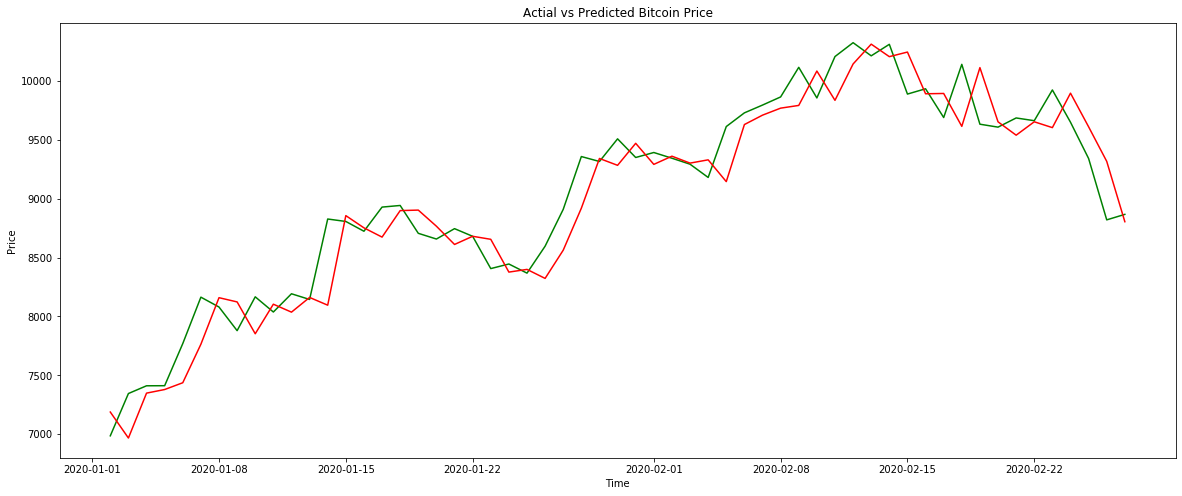

In [44]:
plt.figure(figsize=(20, 8))
plt.plot(testDate, testY.to_numpy(), color = 'green', label='Actual Price of Bitcoin')
plt.plot(testDate, predictions, color = 'red', label='Predicted Price of Bitcoin')
plt.title('Actial vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [94]:
#Applying Ridge Regularization on new Dataset

In [45]:
ridge = Ridge()
ridge.fit(trainX, trainY)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
predictions = lasso.predict(testX)

In [47]:
print('\nCoefficients: ', linerRegression.coef_)
print('\nIntercept: ', linerRegression.intercept_)

# Evaluation Metrics
print("\nMAE: ", metrics.mean_absolute_error(testY, predictions))
print("\nMSE: ", metrics.mean_squared_error(testY, predictions))
print('\nRMSE: ', np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('\nR-Square: ', metrics.r2_score(testY, predictions))


Coefficients:  [ 0.01912502 -0.06672302 -0.07633558  1.12056837]

Intercept:  14.09933828490739

MAE:  195.74652825281683

MSE:  64338.44642498539

RMSE:  253.65024428331503

R-Square:  0.9062409210489898


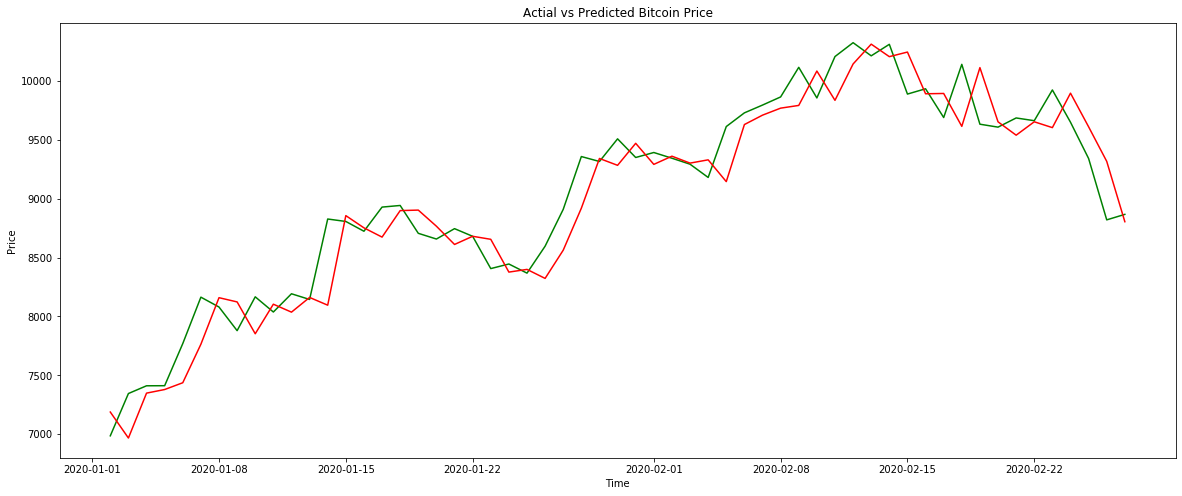

In [48]:
plt.figure(figsize=(20, 8))
plt.plot(testDate, testY.to_numpy(), color = 'green', label='Actual Price of Bitcoin')
plt.plot(testDate, predictions, color = 'red', label='Predicted Price of Bitcoin')
plt.title('Actial vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [99]:
#Bitcoin Price Prediction Using Recurrent Neural Network
# LSTM ->  Long Short Term Memory Recurrent Neural Network

In [105]:
# Using Adj Close as a feature to train the LSTM model
# Use MinMaxScaler to normalize Adj Close to range from 0 to 1

values = df['Adj Close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [106]:
train, test = train_test_split(scaled, test_size=0.3, random_state=None, shuffle=False)
print(len(train), len(test))

1353 580


In [107]:
# Create function for creating dataset with look back

def create_dataset(dataset, look_back):
    dataX = dataset[0:len(dataset)-look_back]
    dataY = dataset[look_back:len(dataset)]
    return np.array(dataX), np.array(dataY)

In [108]:
# Generate dataset for trainX, trainY, testX, testY

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape X for model training
trainX = np.reshape(trainX, (len(trainX), 1, trainX.shape[1]))
testX = np.reshape(testX, (len(testX), 1, testX.shape[1]))

In [109]:
# Running the LSTM model with 300 epochs

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=100, batch_size=16, shuffle=False)


Epoch 1/100
1352/1352 [==============================] - 3s 2ms/step - loss: 0.1248 - accuracy: 7.3964e-04
Epoch 2/100
1352/1352 [==============================] - 2s 1ms/step - loss: 0.0413 - accuracy: 7.3964e-04
Epoch 3/100
1352/1352 [==============================] - 2s 1ms/step - loss: 0.0329 - accuracy: 7.3964e-04
Epoch 4/100
1352/1352 [==============================] - 2s 2ms/step - loss: 0.0140 - accuracy: 0.0015
Epoch 5/100
1352/1352 [==============================] - 2s 2ms/step - loss: 0.0037 - accuracy: 0.0015
Epoch 6/100
1352/1352 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.0015
Epoch 7/100
1352/1352 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 0.0015
Epoch 8/100
1352/1352 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 0.0015
Epoch 9/100
1352/1352 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 0.0015
Epoch 10/100
1352/1352 [==============================] - 2s

In [111]:
predicted_prices = model.predict(testX)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_price = scaler.inverse_transform(testY)

predicted_prices = predicted_prices.flatten()
real_price = real_price.flatten()

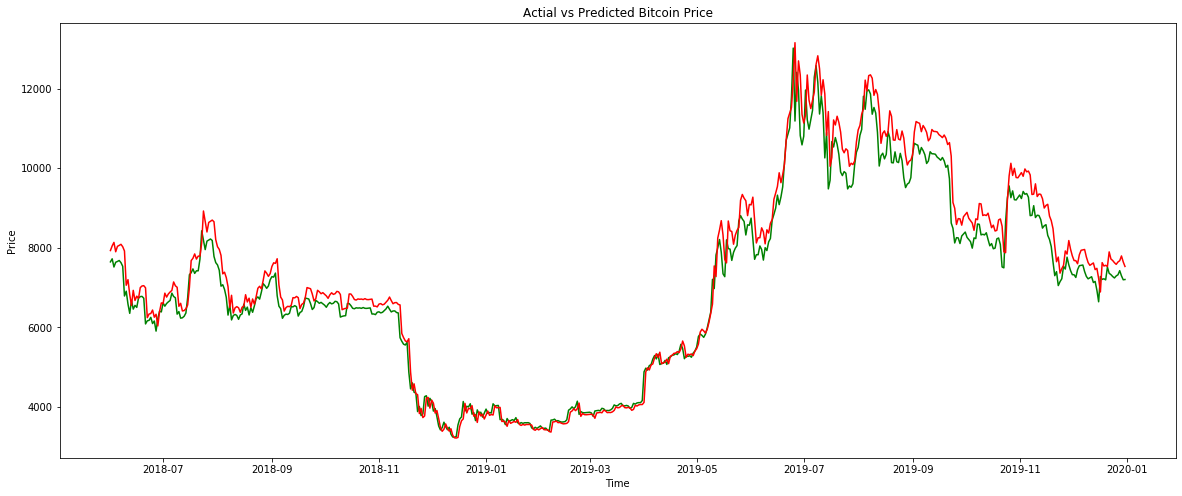

In [112]:
plt.figure(figsize=(20, 8))
plt.plot(testDate.drop(testDate[-1]), real_price, color = 'green', label='Actual Price of Bitcoin')
plt.plot(testDate.drop(testDate[-1]), predicted_prices, color = 'red', label='Predicted Price of Bitcoin')
plt.title('Actial vs Predicted Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [113]:
# Evaluation Metrics
print("\nMAE: ", metrics.mean_absolute_error(real_price, predicted_prices))
print("\nMSE: ", metrics.mean_squared_error(real_price, predicted_prices))
print('\nRMSE: ', np.sqrt(metrics.mean_squared_error(real_price, predicted_prices)))
print('\nR-Square: ', metrics.r2_score(real_price, predicted_prices))


MAE:  330.02316

MSE:  193717.55

RMSE:  440.13354

R-Square:  0.9636225207983159


In [114]:
# Bitcoin price prediction using Time Series Analysis
# ARIMA ->  Auto Regressive Integrated Moving Average

In [115]:
# Dicky Fuller Test
def DFTest(series):
    testdf = adfuller(series)
    print("DF test p-value : %.16f" %testdf[1] )

# Seasonal Trend Decomposition.
def decompose(series):
    plt.figure(figsize = (14,7))
    seasonal_decompose(series).plot()
    plt.show()
    
# Plotting of results  
def plots(series):
    plt.figure(figsize = (10,6))
    sns.lineplot(data = series, color = 'blue', label = 'observed line plot')

DF Test->
DF test p-value : 0.3606177911845247


<Figure size 1008x504 with 0 Axes>

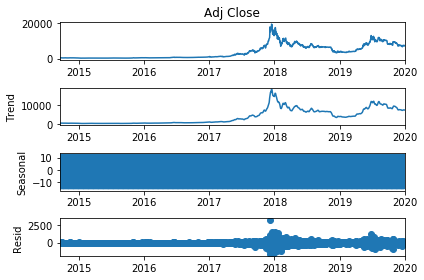

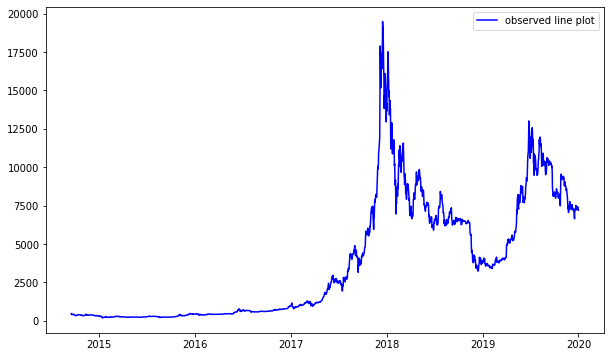

In [116]:
print("DF Test->")
# Running Tests
DFTest(prices)
decompose(prices)
plots(prices)

DF test p-value : 0.8648065488139598


<Figure size 1008x504 with 0 Axes>

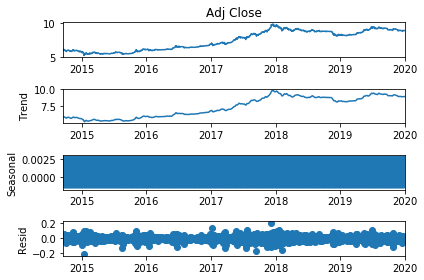

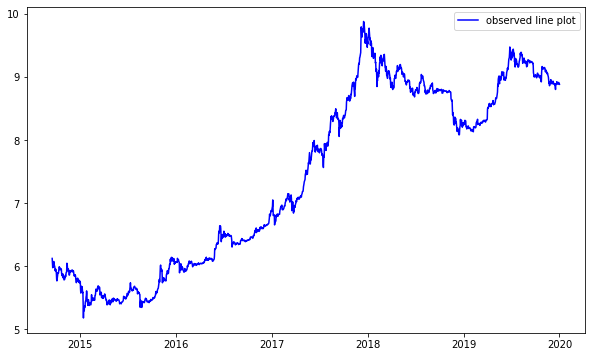

In [117]:
# Log Transformation
prices_log = np.log(prices)

# Running Tests
DFTest(prices_log)
decompose(prices_log)
plots(prices_log)

DF test p-value : 0.0000000000000000


<Figure size 1008x504 with 0 Axes>

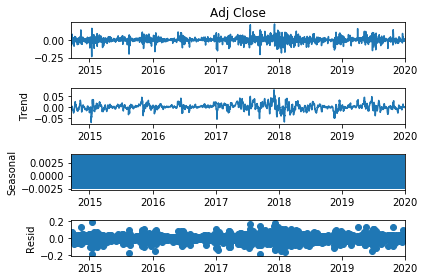

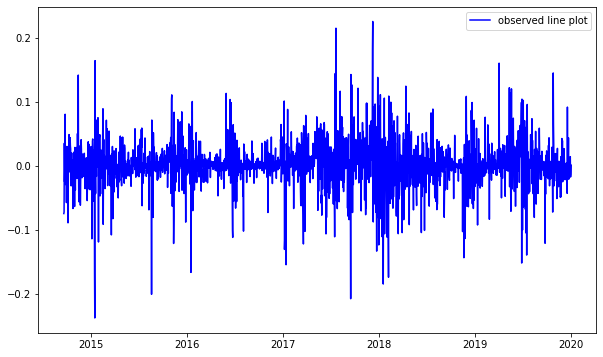

In [118]:
# Regular time shift applied to Log transformed prices

# prices_log with regular shift transform
prices_log_r = prices_log - prices_log.shift(1)
prices_log_r.dropna(inplace = True)

DFTest(prices_log_r)
decompose(prices_log_r)
plots(prices_log_r)

In [119]:
a = [[1,2,3], [1],[1,2,3]]
params = list(product(*a))

In [120]:
params

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [121]:
results = []   
min_aic = float('inf')
best_param = []

# checking different set of params for best fit
for param in params:
    try:
        model = ARIMA(prices_log, order = param).fit(disp = -1)
    except LinAlgError:
        print('Rejected Parameters:', param)
        continue
    except ValueError:
        print('Rejected Parameters:', param)
        continue
    if(min_aic > model.aic):
        min_aic = model.aic
        best_param = param
        best_model = model
    results.append([param, model.aic])

/home/hammadallauddin/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/hammadallauddin/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/hammadallauddin/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/hammadallauddin/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/hammadallauddin/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so infe

In [122]:
print("\n\nBest Params: ", best_param,min_aic)
print("\n\nResults: ", results)
print("\n\nBest Model Fitted Value: ", best_model.fittedvalues)



Best Params:  (2, 1, 2) -7091.899080581826


Results:  [[(1, 1, 1), -7089.470268852086], [(1, 1, 2), -7087.882453292842], [(1, 1, 3), -7087.256198431528], [(2, 1, 1), -7087.983671373063], [(2, 1, 2), -7091.899080581826], [(2, 1, 3), -7090.134192329223], [(3, 1, 1), -7087.677141345285], [(3, 1, 2), -7090.893181196027], [(3, 1, 3), -7089.535817084968]]


Best Model Fitted Value:  Date
2014-09-18    0.001427
2014-09-19   -0.000441
2014-09-20    0.001301
2014-09-21    0.002626
2014-09-22   -0.000534
                ...   
2019-12-28    0.004841
2019-12-29   -0.002286
2019-12-30    0.005345
2019-12-31   -0.002380
2020-01-01    0.003715
Length: 1932, dtype: float64


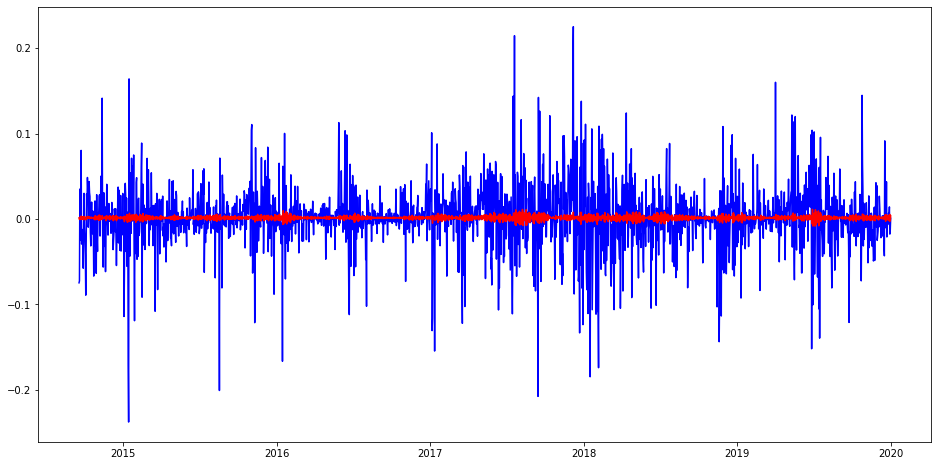

In [123]:
plt.figure(figsize=(16,8))
sns.lineplot(data = prices_log_r, color = 'blue')
sns.lineplot(data = best_model.fittedvalues, color = 'red')

In [124]:
fitted_values = best_model.fittedvalues
fitted_values = fitted_values.cumsum()
fitted_values = fitted_values + prices_log[0]
final_values = np.exp(fitted_values)

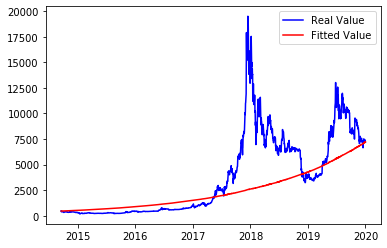

In [125]:
d = {'prices' : prices, 'prices_log' : prices_log, 'price_log_r' : prices_log_r, 'fitted_values' : fitted_values, 'final_values' : final_values}
summaryDF = pd.DataFrame(data = d)
sns.lineplot(data = summaryDF['prices'], color = 'blue', label  = 'Real Value')
sns.lineplot(data = summaryDF['final_values'], color = 'red', label  = 'Fitted Value')

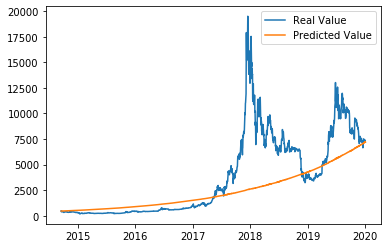

In [126]:
predicted_values = np.exp((best_model.predict(start = 1, end = prices.size).cumsum()) + prices_log[0])
sns.lineplot(data = prices, label  = 'Real Value')
sns.lineplot(data = predicted_values, label = 'Predicted Value')

In [127]:
# Evaluation Metrics
print("\nMAE: ", metrics.mean_absolute_error(prices, predicted_values))
print("\nMSE: ", metrics.mean_squared_error(prices, predicted_values))
print('\nRMSE: ', np.sqrt(metrics.mean_squared_error(prices, predicted_values)))
print('\nR-Square: ', metrics.r2_score(prices, predicted_values))


MAE:  1863.2175152941418

MSE:  9932428.251877023

RMSE:  3151.575518986817

R-Square:  0.3657212774468114
